## Dataset retrieved from kaggle.com ##

This dataset was provided by DataSnaek, you can download the dataset [here](https://www.kaggle.com/datasnaek/league-of-legends)


General Info (from dataSnaek):

"This is a collection of over 50,000 ranked games from the game League of Legends, as well as json files containing a way to convert between champion and summoner spell IDs and their names. For each game, there are fields for:

    Game ID
    Game Duration (in seconds)
    Season ID
    Winner (0 = team1, 1 = team2)
    First Baron, dragon, tower, blood, inhibitor and Rift Herald (0 = team1, 1 = team2)
    Champions and summoner spells for each team (Stored as Riot's champion and summoner spell IDs)
    The number of tower, inhibitor, Baron, dragon and Rift Herald kills each team has
    The 5 bans of each team (Again, champion IDs are used)

This dataset was collected using the Riot Games API, which makes it easy to lookup and collect information on a users ranked history and collect their games. However finding a list of usernames is the hard part, in this case I am using a list of usernames scraped from 3rd party LoL sites.

Possible Uses

There is a vast amount of data in just a single LoL game. This dataset takes the most relevant information and makes it available easily for use in things such as attempting to predict the outcome of a LoL game, analysing which in-game events are most likely to lead to victory, understanding how big of an effect bans of a specific champion have, and more."

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
data = pd.read_csv('games.csv')

In [3]:
data.head()

,gameId,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1949,9,0,0,1,1,1,1,0,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1851,9,0,1,1,1,0,1,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1493,9,0,0,1,1,1,0,0,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1758,9,0,1,1,1,1,1,0,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,2094,9,0,0,1,1,1,1,0,...,3,0,0,1,0,86,11,201,122,18


In [4]:
data.describe()

,gameId,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
count,5.153600e+04,51536.000000,51536.0,51536.000000,51536.000000,51536.000000,51536.000000,51536.000000,51536.000000,51536.000000,...,51536.000000,51536.000000,51536.000000,51536.000000,51536.000000,51536.000000,51536.000000,51536.000000,51536.000000,51536.000000
mean,3.306218e+09,1832.433658,9.0,0.493577,0.507141,0.502134,0.447765,0.286654,0.479471,0.251416,...,5.549849,0.985078,0.414565,1.404397,0.240220,108.203605,107.957991,108.686666,108.636196,108.081031
std,2.946137e+07,511.935772,0.0,0.499964,0.499954,0.500000,0.497269,0.452203,0.499583,0.433832,...,3.860701,1.256318,0.613800,1.224289,0.427221,102.538299,102.938916,102.592143,103.356702,102.762418
min,3.214824e+09,190.000000,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,3.292212e+09,1531.000000,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,38.000000,37.000000,38.000000,38.000000,38.000000
50%,3.319969e+09,1833.000000,9.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,0.000000,0.000000,1.000000,0.000000,90.000000,90.000000,90.000000,90.000000,90.000000
75%,3.327097e+09,2148.000000,9.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,9.000000,2.000000,1.000000,2.000000,0.000000,141.000000,141.000000,141.000000,141.000000,141.000000
max,3.331833e+09,4728.000000,9.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,11.000000,10.000000,4.000000,6.000000,1.000000,516.000000,516.000000,516.000000,516.000000,516.000000


In [5]:
data.rename(columns={'gameDuration': 'gameLength (seconds)'}, inplace=True)

In [6]:
data['gameLength (minutes)'] = data['gameLength (seconds)'].apply(lambda x: x//60)

In [7]:
data = data[['gameId', 'gameLength (seconds)', 'gameLength (minutes)', 'seasonId', 'winner', 'firstBlood',
       'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon',
       'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1', 't1_champ1_sum2',
       't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2', 't1_champ3id',
       't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id', 't1_champ4_sum1',
       't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1', 't1_champ5_sum2',
       't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills',
       't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3', 't1_ban4',
       't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHeraldKills', 't2_ban1', 't2_ban2', 't2_ban3', 't2_ban4',
       't2_ban5']]

In [8]:
data.head()

,gameId,gameLength (seconds),gameLength (minutes),seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1949,32,9,0,0,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1851,30,9,0,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1493,24,9,0,0,1,1,1,0,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1758,29,9,0,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,2094,34,9,0,0,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


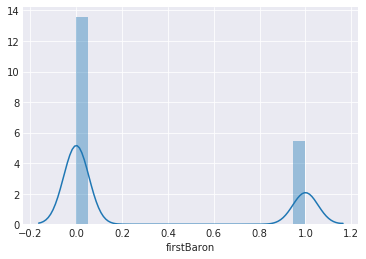

In [9]:
sns.distplot(data['firstBaron'])

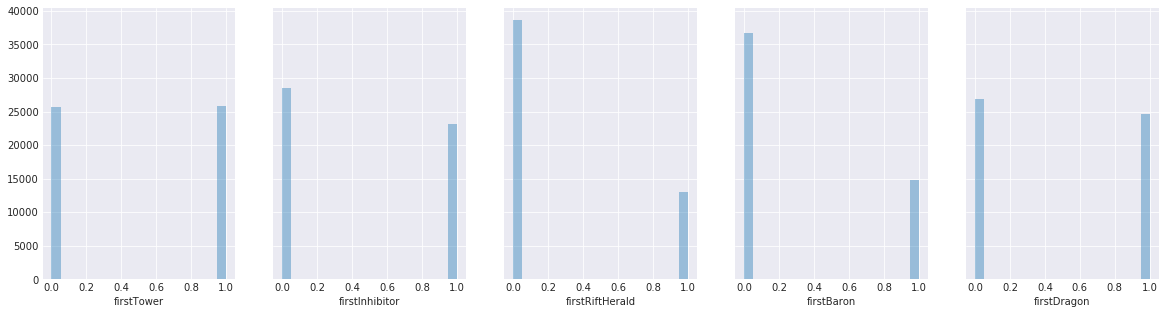

In [10]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5, sharey=True, figsize=(20,5))
sns.distplot(data['firstTower'],ax=ax1,kde=False)
sns.distplot(data['firstInhibitor'],ax=ax2,kde=False)
sns.distplot(data['firstRiftHerald'],ax=ax3, kde=False)
sns.distplot(data['firstBaron'],ax=ax4,kde=False)
sns.distplot(data['firstDragon'],ax=ax5, kde=False)

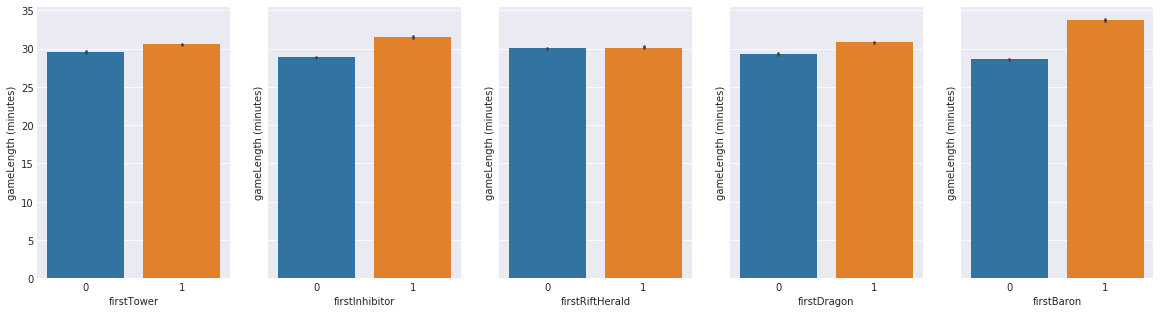

In [11]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5, sharey=True, figsize=(20,5))
sns.barplot(x='firstTower',y='gameLength (minutes)',data=data,ax=ax1)
sns.barplot(x='firstInhibitor',y='gameLength (minutes)',data=data,ax=ax2)
sns.barplot(x='firstRiftHerald',y='gameLength (minutes)',data=data,ax=ax3,)
sns.barplot(x='firstDragon',y='gameLength (minutes)',data=data,ax=ax4)
sns.barplot(x='firstBaron',y='gameLength (minutes)',data=data,ax=ax5,)

In [12]:
data['t1_champ1id'][0]

8

Using the JSON given to retrieve champion names

In [13]:
import json

In [14]:
jDict = pd.read_json('champion_info.json')

In [15]:
champData = jDict['data']

In [16]:
champData[1]

{'id': 1, 'key': 'Annie', 'name': 'Annie', 'title': 'the Dark Child'}

In [17]:
champData[2]

{'id': 2, 'key': 'Olaf', 'name': 'Olaf', 'title': 'the Berserker'}

In [18]:
champData.head()

1      {'title': 'the Dark Child', 'id': 1, 'key': 'A...
10     {'title': 'The Judicator', 'id': 10, 'key': 'K...
101    {'title': 'the Magus Ascendant', 'id': 101, 'k...
102    {'title': 'the Half-Dragon', 'id': 102, 'key':...
103    {'title': 'the Nine-Tailed Fox', 'id': 103, 'k...
Name: data, dtype: object

In [19]:
def idToName(ID, dic):
    champ = dic[ID]
    return champ['name']

In [20]:

champList = []
for info in champData:
    champList.append(info['name'])
champList = sorted(champList)
print(champList)
    

['Aatrox', 'Ahri', 'Akali', 'Alistar', 'Amumu', 'Anivia', 'Annie', 'Ashe', 'Aurelion Sol', 'Azir', 'Bard', 'Blitzcrank', 'Brand', 'Braum', 'Caitlyn', 'Camille', 'Cassiopeia', "Cho'Gath", 'Corki', 'Darius', 'Diana', 'Dr. Mundo', 'Draven', 'Ekko', 'Elise', 'Evelynn', 'Ezreal', 'Fiddlesticks', 'Fiora', 'Fizz', 'Galio', 'Gangplank', 'Garen', 'Gnar', 'Gragas', 'Graves', 'Hecarim', 'Heimerdinger', 'Illaoi', 'Irelia', 'Ivern', 'Janna', 'Jarvan IV', 'Jax', 'Jayce', 'Jhin', 'Jinx', 'Kalista', 'Karma', 'Karthus', 'Kassadin', 'Katarina', 'Kayle', 'Kayn', 'Kennen', "Kha'Zix", 'Kindred', 'Kled', "Kog'Maw", 'LeBlanc', 'Lee Sin', 'Leona', 'Lissandra', 'Lucian', 'Lulu', 'Lux', 'Malphite', 'Malzahar', 'Maokai', 'Master Yi', 'Miss Fortune', 'Mordekaiser', 'Morgana', 'Nami', 'Nasus', 'Nautilus', 'Nidalee', 'Nocturne', 'Nunu', 'Olaf', 'Orianna', 'Ornn', 'Pantheon', 'Poppy', 'Quinn', 'Rakan', 'Rammus', "Rek'Sai", 'Renekton', 'Rengar', 'Riven', 'Rumble', 'Ryze', 'Sejuani', 'Shaco', 'Shen', 'Shyvana', 'Singe

In [21]:
idToName(10, champData)

'Kayle'

In [23]:
champCols = ['t1_champ1id','t1_champ2id','t1_champ3id','t1_champ4id','t1_champ5id',
             't2_champ1id','t2_champ2id','t2_champ3id','t2_champ4id','t2_champ5id']

In [24]:
banCols = ['t1_ban1','t1_ban2','t1_ban3','t1_ban4','t1_ban5',
             't2_ban1','t2_ban2','t2_ban3','t2_ban4','t2_ban5',]

In [25]:
for c in champCols:
    data[c] = data[c].apply(lambda x: idToName(x, champData))

Need to figure out how to deal with -1's for the bans, I'm assuming that means they didn't pick a ban in time

In [ ]:
#for c in banCols:
    #data[c] = data[c].apply(lambda x: idToName(x, champData))

In [33]:
data[['t1_ban1','t1_ban2','t1_ban3','t1_ban4','t1_ban5',
             't2_ban1','t2_ban2','t2_ban3','t2_ban4','t2_ban5']]

,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,92,40,69,119,141,114,67,43,16,51
1,51,122,17,498,19,11,67,238,51,420
2,117,40,29,16,53,157,238,121,57,28
3,238,67,516,114,31,164,18,141,40,51
4,90,64,412,25,31,86,11,201,122,18
5,117,6,238,122,105,119,134,154,63,31
6,157,11,141,32,35,75,42,31,40,429
7,117,19,157,29,18,157,38,122,40,238
8,154,117,31,126,157,28,51,53,157,40
9,31,238,141,17,119,64,141,84,67,53


In [34]:
data[champCols].head()

,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,t2_champ5id
0,Vladimir,Bard,Kog'Maw,Master Yi,Viktor,Graves,Xayah,Darius,Zed,Thresh
1,Draven,Irelia,Nidalee,Kayle,Shaco,Malphite,Morgana,Hecarim,Yasuo,Riven
2,Tristana,Kayn,Nami,Rumble,Kassadin,Cassiopeia,Thresh,Jayce,Jax,Ashe
3,Maokai,Brand,Twitch,Orianna,Dr. Mundo,Malzahar,Warwick,Thresh,Riven,Ashe
4,Warwick,Twitch,Janna,Draven,Syndra,Sona,Jarvan IV,Kayn,Kassadin,Caitlyn


In [35]:
individual_info_data = pd.read_json('individual_champion_info.json')

In [36]:
individual_info_data.head()

,data,format,type,version
Aatrox,"{'version': '6.24.1', 'id': 'Aatrox', 'key': '...",standAloneComplex,champion,6.24.1
Ahri,"{'version': '6.24.1', 'id': 'Ahri', 'key': '10...",standAloneComplex,champion,6.24.1
Akali,"{'version': '6.24.1', 'id': 'Akali', 'key': '8...",standAloneComplex,champion,6.24.1
Alistar,"{'version': '6.24.1', 'id': 'Alistar', 'key': ...",standAloneComplex,champion,6.24.1
Amumu,"{'version': '6.24.1', 'id': 'Amumu', 'key': '3...",standAloneComplex,champion,6.24.1


In [37]:
ind_data = pd.read_json((individual_info_data['data']).to_json(), orient='index')

In [38]:
ind_data.head()

,blurb,id,image,info,key,name,partype,stats,tags,title,version
Aatrox,"Aatrox is a legendary warrior, one of only fiv...",Aatrox,"{'full': 'Aatrox.png', 'sprite': 'champion0.pn...","{'attack': 8, 'defense': 4, 'magic': 3, 'diffi...",266,Aatrox,BloodWell,"{'hp': 537.8, 'hpperlevel': 85.0, 'mp': 105.6,...","[Fighter, Tank]",the Darkin Blade,6.24.1
Ahri,Unlike other foxes that roamed the woods of so...,Ahri,"{'full': 'Ahri.png', 'sprite': 'champion0.png'...","{'attack': 3, 'defense': 4, 'magic': 8, 'diffi...",103,Ahri,MP,"{'hp': 514.4, 'hpperlevel': 80.0, 'mp': 334.0,...","[Mage, Assassin]",the Nine-Tailed Fox,6.24.1
Akali,There exists an ancient order originating in t...,Akali,"{'full': 'Akali.png', 'sprite': 'champion0.png...","{'attack': 5, 'defense': 3, 'magic': 8, 'diffi...",84,Akali,Energy,"{'hp': 587.8, 'hpperlevel': 85.0, 'mp': 200.0,...",[Assassin],the Fist of Shadow,6.24.1
Alistar,As the mightiest warrior to ever emerge from t...,Alistar,"{'full': 'Alistar.png', 'sprite': 'champion0.p...","{'attack': 6, 'defense': 9, 'magic': 5, 'diffi...",12,Alistar,MP,"{'hp': 613.36, 'hpperlevel': 106.0, 'mp': 278....","[Tank, Support]",the Minotaur,6.24.1
Amumu,''Solitude can be lonelier than death.''<br><b...,Amumu,"{'full': 'Amumu.png', 'sprite': 'champion0.png...","{'attack': 2, 'defense': 6, 'magic': 8, 'diffi...",32,Amumu,MP,"{'hp': 613.12, 'hpperlevel': 84.0, 'mp': 287.2...","[Tank, Mage]",the Sad Mummy,6.24.1


to do:

* Figure out how to deal with -1 values for player bans
* Find a way to incorporate champion types (create new dataFrame?)
* ML models on game statistics: predict outcome
* analyze champion picks vs. bans--- predict outcome
* analyze team composition and predict outcome